<h2 style='color:blue' align='center'>Small Image Classification Using CNN</h2>

In this notebook we will classify small images cifar10 dataset from tensorflow keras datasets.
There are total 10 classes as shown below. We will use CNN for classification
                                                        

<img src="small_images.jpg">

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = datasets.cifar10.load_data()

In [4]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the shapes of the data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [5]:
#show first five images
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is 2d array, for our classification having 1d array is good.so we convert it to 1d array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Lets plot some images to see what thy are

In [9]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

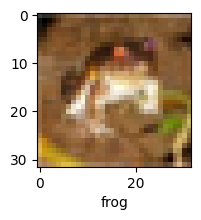

In [10]:
plot_sample(x_train,y_train,0)

In [11]:
print("Shuffling check:")
print(f"First few labels : {y_train[:10]}")

Shuffling check:
First few labels : [6 9 9 4 1 1 2 7 8 3]


Normalizing the training data

In [12]:
x_train = x_train/255.0
x_test = x_test/255.0

In [13]:
print(f"Min pixel value in x_train: {x_train.min()}")
print(f"Max pixel value in x_train: {x_train.max()}")
print(f"Min pixel value in x_train: {x_train.min()}")
print(f"Max pixel value in x_train: {x_train.max()}")

Min pixel value in x_train: 0.0
Max pixel value in x_train: 1.0
Min pixel value in x_train: 0.0
Max pixel value in x_train: 1.0


<h3 style='color:pink'>Build simple artificial neural network for image classification</h3>
It involves several steps involving data preprocessing,defining the model architecture, compiling the model and training it.
Here's a basic example using TensorFlow/Keras to build an ANN for classifying CIFAR-10 images.
1.Steps to build a simple ANN
2.Import Libraries
3.Load and Preprocess Data
4.Define the Model Architecture
5.Compile the Model
6.Train the Model
7.Evaluate the Model

<strong>Flatten Layer</strong><br>
The flatten layer is like a bridge between convolutional (or pooling) layers and dense layers in convolutional neural networks (CNNs).<br>
What it does is reshape multi-dimensional data (like a 2D matrix) into a one-dimensional vector.<br>
<strong>Dense Layer</strong><br>
The dense layer, also known as a fully connected layer, is the workhorse of an ANN.<br>
Every neuron in a dense layer is connected to every neuron in the preceding layer.<br>
This means each neuron receives input from all the neurons of the previous layer.<br>
<strong>ReLU (Rectified Linear Unit)</strong><br>
ReLU is a popular activation function used in neural networks, especially in convolutional neural networks (CNNs). It stands for Rectified Linear Unit and is defined as:𝑓(𝑥)=max(0,𝑥)
In simpler terms, the ReLU function takes a real-valued input and outputs the same value if it is positive, and zero if it is negative. This non-linearity helps the network to learn complex patterns and features in the data.<br>
<strong>Softmax</strong><br>
Softmax is an activation function commonly used in the output layer of a neural network when performing multiclass classification. The softmax function takes a vector of raw scores (logits) and converts them into probabilities.

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax'),
    
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5)

C:\Users\krish\OneDrive\Desktop\Python\newenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.3062 - loss: 1.9298
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4202 - loss: 1.6347
Epoch 3/5
 959/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.4532 - loss: 1.5491

<strong>You can see that at the end of 5 epochs the accuracy is 49%<strong>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

<h3 style='color:pink'>Build simple convolutional neural network for image classificatio</h3>

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
    
])

Purpose: This CNN is designed for image classification tasks, where the goal is to classify input images into one of the 10 classes. The convolutional and pooling layers extract features from the images, while the dense layers process these features to make the final classification decision.

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

<strong>Loss Function in Neural Networks</strong>
The loss function is a critical component in training neural networks. It measures how well the model's predictions match the actual target values. The goal during training is to minimize this loss, which means making the model's predictions as accurate as possible.

<strong>Epochs</strong> epochs are crucial for iteratively improving the model's performance by repeatedly updating its parameters based on the training data.

In [ ]:
cnn.fit(x_train,y_train,epochs=10)

With CNN at the end of 5 epochs,accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy.
also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(x_test,y_test)

In [ ]:
y_pred = cnn.predict(x_test)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(x_test,y_test,6)

In [ ]:
classes[y_classes[6]]

In [ ]:
plot_sample(x_test,y_test,9)

In [ ]:
classes[y_classes[9]]

In [ ]:
plot_sample(x_test,y_test,3)

In [ ]:
classes[y_classes[3]]

In [ ]:
plot_sample(x_test,y_test,2)

In [ ]:
classes[y_classes[2]]